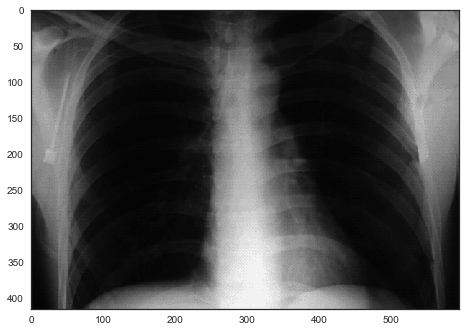

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


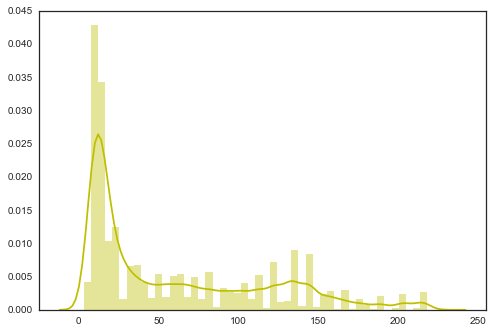

In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH04/Fig0459(a)(orig_chest_xray).tif')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()
ax = sns.distplot(im.flatten(), color="y")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide


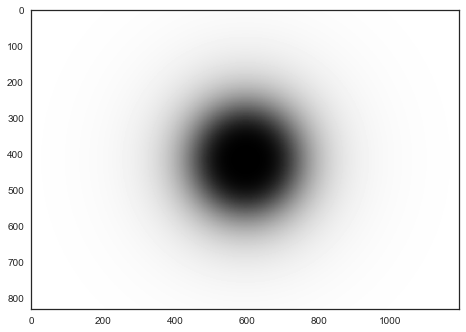

In [6]:
P = im.shape[0]*2
Q = im.shape[1]*2
K1 = 0.5
K2 = 0.75

def ButterWorth_Filter(shape,D0,n):
    D = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            D[i][j] = np.sqrt(np.square(i-shape[0]/2)+np.square(j-shape[1]/2))
    H = 1/(1+np.power(D0/D,2*n))
    return H

BHPF = ButterWorth_Filter((P,Q),160,2)
plt.imshow(BHPF)
plt.gray()
plt.show()

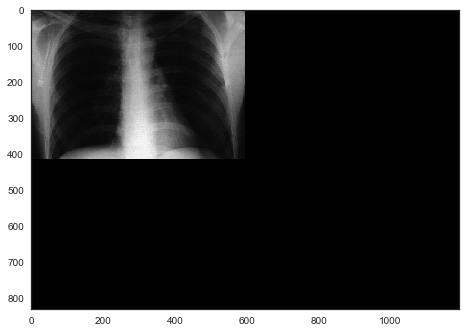

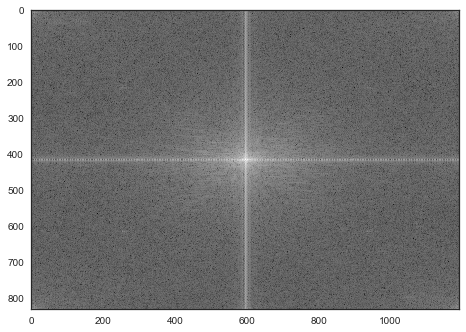

In [7]:
#1 填補原圖，成(2M,2N)
im_p = np.zeros((im.shape[0]*2,im.shape[1]*2))
im_p[:im.shape[0],:im.shape[1]] = im.copy()
plt.imshow(im_p)

plt.show()
# 平移頻率至中央
for i in range(im_p.shape[0]):
    for j in range(im_p.shape[1]):
        im_p[i][j] = im_p[i][j]*np.power(-1,i+j)
#計算DFT
fft_f = np.fft.fft2(im_p)
plt.imshow(1+np.log10(np.abs(fft_f)))
plt.show()

In [13]:
revert_im = np.real(np.fft.ifft2(np.multiply((K1+K2*BHPF),fft_f)))
for i in range(revert_im.shape[0]):
    for j in range(revert_im.shape[1]):
        revert_im[i][j] = revert_im[i][j]*np.power(-1,i+j)

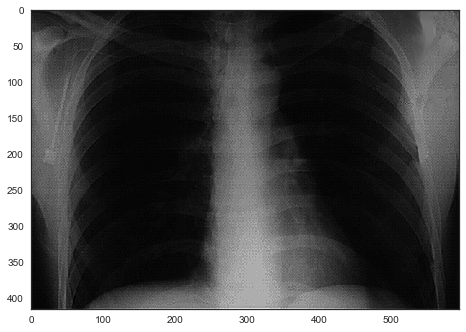

[[ 12.94955672  10.91535357  16.42198485 ...,  67.47349126  81.14680239
   89.21834651]
 [ 10.58807013  15.79579842  15.04055723 ...,  69.60508215  69.60711322
   90.00370403]
 [ 15.57166447  14.70575323  21.78005632 ...,  69.68836146  81.84090906
   90.68984794]
 ..., 
 [ 40.56287087  37.98355552  47.5779677  ...,   4.80194913   1.34501915
   16.22467357]
 [ 41.26933031  41.32675576  40.90073098 ...,   5.27725263   1.78464077
   16.58953556]
 [ 69.49417077  57.31660075  69.66429336 ...,   7.12497145   4.80414293
   18.09019594]]


In [15]:
# revert_im[revert_im>255] = 255
# revert_im[revert_im<0] = 0
output = revert_im[:im.shape[0],:im.shape[1]]
plt.imshow(revert_im[:im.shape[0],:im.shape[1]])
plt.show()
print(revert_im[100:im.shape[0],100:im.shape[1]])

[   10   191  5063 13365 11833 23818 14253 10052 11615  7396  6358  4991
  4576  3500  3060  2993  2833  2502  2183  1876  1828  1920  2021  1993
  1898  1931  1931  1949  2050  1934  1776  1738  1962  1844  1703  1725
  1808  1650  1543  1521  1557  1561  1392  1384  1396  1465  1419  1341
  1488  1455  1422  1367  1360  1407  1495  1755  1749  1667  1625  1466
  1793  1778  1627  1639  1681  1767  2558  2169  1878  1818  1750  2174
  1999  1455  1268  1066  1038   909   879   887   913   947  1048   879
   730   702   604   580   511   437   416   370   360   424   454   394
   404   379   405   397   374   424   406   312   197   146   268  1506
   570   288   198   167   161   112    58    20    21    19    21     8
    10    24     7     8     4     2    10     5     4     2     7     1
     2     3     1    18     7     4     7     1     1     0     2     4
     1     4     2     2     1     0     1     8     2     1    44     4
     2     1     2     0     0     0     0     0   

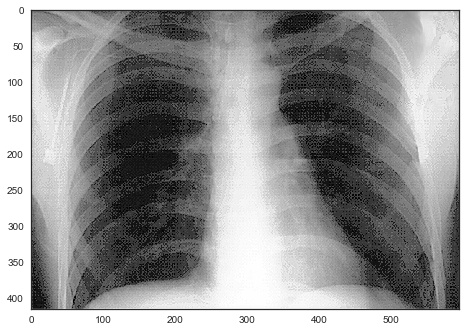

In [18]:
output = output.astype(np.uint8)
L = 256
hist, bin_edges = np.histogram(output.flatten(), density=False,bins=L,range=(0,L))
print(hist,bin_edges)

Accumulate_hist = np.add.accumulate(hist)
S = (L-1)/(output.shape[0]*output.shape[1])*Accumulate_hist

new_pic = np.zeros(output.shape)
it = np.nditer(output,flags=['multi_index'],op_flags=['readonly'])
while not it.finished:
    new_pic[it.multi_index[0]][it.multi_index[1]] = S[it[0]]
    it.iternext()
print(new_pic.astype(np.uint8))
plt.imshow(new_pic.astype(np.uint8))
plt.gray()
plt.show()